# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Matemática Para Machine Learning</font>

## Implementação do Algoritmo Support Vector Machine (Classificação) em Python

Papers do Algoritmo SVM:
    
http://cs229.stanford.edu/notes/cs229-notes3.pdf

https://pdfs.semanticscholar.org/b944/a74a79c701d6c2a0ff2d28a0d16b9d8b1cd0.pdf

Outros Papers:

https://paperswithcode.com

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
%matplotlib inline

## Definindo os Cálculos Matemáticos

### Stochastic Gradient Descent

O SVM aprenderá usando o algoritmo de descida de gradiente estocástico (SGD). O Gradient Descent minimiza uma função seguindo os gradientes da função de custo.

### Calculando o Erro

Para calcular o erro de uma previsão, primeiro precisamos definir a função objetiva do SVM.

#### Hinge Loss Function

Para fazer isso, precisamos definir a função de perda, para calcular o erro de previsão. Nós usaremos a Hinge Loss para nosso exemplo:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ é a função de perda, $x$ a amostra, $y$ é o verdadeiro rótulo, $f(x)$ o rótulo previsto.

Isso significa o seguinte:
$$
c(x, y, f(x))= 
\begin{cases}
    0,& \text{if } y*f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

Então, considere, se y e f(x) são valores com sinais $(+1,-1)$:

<ul>
    <li>a perda é 0, se $y*f(x)$ são positivos, respectivamente os dois valores têm o mesmo sinal.</li>
    <li>a perda é $1-y*f(x)$ se $y*f(x)$ é negativo</li>
</ul>

#### Função Objetivo

Como definimos a função de perda, podemos agora definir a função objetivo para o SVM:

$$\underset{w}{min}\ \lambda\parallel w\parallel^2 + \ \sum_{i=1}^n\big(1-y_i \langle x_i,w \rangle\big)_+$$

Como você pode ver, nosso objetivo de um SVM consiste em dois termos. O primeiro termo é um regularizador, o segundo termo a perda. O regularizador equilibra entre a maximização e a perda de margem. 

#### Derivando a função objetiva

Para minimizar essa função, precisamos dos gradientes da função.

Como temos dois termos, vamos conduzi-los separadamente usando a regra da soma na diferenciação.

$$
\frac{\delta}{\delta w_k} \lambda\parallel w\parallel^2 \ = 2 \lambda w_k
$$

$$
\frac{\delta}{\delta w_k} \big(1-y_i \langle x_i,w \rangle\big)_+ \ = \begin{cases}
    0,& \text{if } y_i \langle x_i,w \rangle\geq 1\\
    -y_ix_{ik},              & \text{então}
\end{cases}
$$

Isso significa que, se tivermos uma amostra classificada incorretamente $x_i$, respectivamente $y_i \langle x_i,w \rangle \ < \ 1$, nós atualizamos o vetor de peso w usando os gradientes de ambos os termos, se $y_i \langle x_i,w \rangle \geq 1$ nós apenas atualizamos w pelo gradiente do regularizador. Para resumir, a nossa descida de gradiente estocástica para o SVM parece com isso:

if $y_i⟨x_i,w⟩ < 1$:
$$
w = w + \eta (y_ix_i - 2\lambda w)
$$
então:
$$
w = w + \eta (-2\lambda w)
$$

## Dataset

Primeiro, precisamos definir um conjunto de dados rotulados. 

In [2]:
# Definindo os dados

X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

y = np.array([-1,-1,1,1,1])

Para simplificar, incluímos o termo de polarização (bias) no conjunto de dados:

In [3]:
# Definindo os dados, mais o bias

X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

In [4]:
print(X)

[[-2  4 -1]
 [ 4  1 -1]
 [ 1  6 -1]
 [ 2  4 -1]
 [ 6  2 -1]]


In [5]:
print(y)

[-1 -1  1  1  1]


Esse pequeno conjunto de dados contém duas amostras rotuladas com $-1$ e três amostras rotuladas com $+1$. Isso significa que temos um problema de classificação binária, pois o conjunto de dados contém duas classes de amostra. Vamos plotar o conjunto de dados:

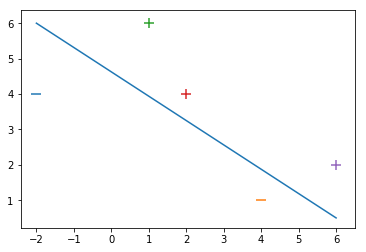

In [6]:
for d, sample in enumerate(X):
    # Plot das amostras negativas
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot das amostras positivas
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Imprimir um hiperplano possível, isto é, separando as duas classes.
plt.plot([-2,6],[6,0.5])

## Vamos começar a implementar a descida de gradiente estocástica

Finalmente, podemos codificar nosso algoritmo SGD usando nossas regras de atualização e usando um regularizador em nosso algoritmo. Como temos um pequeno conjunto de dados, que é facilmente linearmente separável, isso na verdade não é necessário e nosso algoritmo SGD provavelmente convergiria mais rápido sem ele. Mas vamos manter aqui a título de compreensão do que estamos fazendo.

Para simplificar, vamos linearmente percorrer o conjunto de amostras. Para conjuntos de dados maiores, faz sentido selecionar aleatoriamente uma amostra durante cada iteração no loop for.

In [7]:
def svm_sgd(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000

    for epoch in range(1,n):
        for i, x in enumerate(X):
            if (Y[i] * np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
            else:
                w = w + eta * (-2  *(1/epoch)* w)

    return w

Vamos executar o SGD $100000$ vezes. Nosso parâmetro de aprendizado eta está definido como $1$. Como parâmetro de regularização, escolhemos $1/t$, então esse parâmetro diminuirá à medida que o número de épocas aumentar.

#### Descrição Linha por Linha da célula com a função svm_sgd()

Linha <b>2</b>: Inicializa o vetor de pesos com zeros<br>
Linha <b>3</b>: Define a taxa de aprendizado para 1<br>
Linha <b>4</b>: Define o número de épocas<br>
Linha <b>6</b>: Itera n vezes em todo o conjunto de dados. O Iterador começa com $1$ para evitar divisão por zero durante o cálculo do parâmetro de regularização<br>
Linha <b>7</b>: Itera sobre cada amostra no conjunto de dados.<br>
Linha <b>8</b>: Condição de classificação incorreta $y_i \langle x_i,w \rangle < 1$<br>
Linha <b>9</b>: Regra de atualização para os pesos $w = w + \eta (y_ix_i - 2\lambda w)$ incluindo a taxa de aprendizado $\eta$ e o regularizador $\lambda$<br>
line <b>11</b>: Se classificado corretamente basta atualizar o vetor de peso pelo termo regularizador derivado $w = w + \eta (-2\lambda w)$.<br>

### Deixe o SVM aprender!

Em seguida, podemos executar nosso código para calcular o vetor de peso adequado, que ajusta os dados de treinamento. Se houver amostras erroneamente classificadas, imprimiremos o número de amostras classificadas incorretamente e classificadas corretamente.

In [8]:
def svm_sgd(X, Y):

    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000


    for epoch in range(1,epochs):
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
            else:
                w = w + eta * (-2  *(1/epoch)* w)

    return w

w = svm_sgd(X,y)
print(w)

[ 1.58876117  3.17458055 11.11863105]


In [9]:
def svm_sgd_plot(X, Y):

    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000
    errors = []


    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)

    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Época')
    plt.ylabel('Classificações Incorretas')
    plt.show()

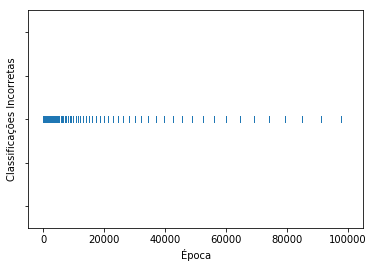

In [10]:
svm_sgd_plot(X,y)

O gráfico acima mostra que o SVM tem menos erros de classificação quanto mais épocas estiver executando. O SVM sempre tentou maximizar a margem entre as duas classes usando nosso regularizador.

Nosso SVM sempre tenta otimizar o hiperplano, maximizando a distância entre as duas classes.

O vetor de peso do SVM, incluindo o termo de polarização (bias) após 100.000 épocas, é $(1.59,  3.17,  11.12)$.<br>
Podemos extrair a seguinte função de previsão agora:


$$
f(x) = \langle x,(1.59,3.17)\rangle - 11.12
$$

O vetor de peso é $(1.59,3.17)$ e o termo de bias é a terceira entrada 11.12.

In [11]:
# Definindo os dados, mais o bias

X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

## Avaliação

Vamos classificar as amostras em nosso conjunto de dados manualmente para verificar se o algoritmo aprendeu corretamente:

Primeira amostra $(-2, 4)$, deveria ser negativo:

$$-2*1,59+4*3,17 - 11,12 = sign(-1,56) = -1$$

Segunda amostra $(4, 1)$, deveria ser negativo:

$$4*1,59+1*3,17 - 11,12 = sign(-1,71) = -1$$

Terceira amostra $(1, 6)$, deveria ser positivo:

$$1*1,59+6*3,17-11,12 = sign(9,46) = +1$$

Quarta amostra $(2, 4)$, deveria ser positivo:

$$2*1,59+4*3,17 - 11,12 = sign(4,68) = +1$$

Quinta amostra $(6, 2)$, deveria ser positivo:

$$6*1,59+2*3,17 - 11,12 = sign(4,58) = +1$$

Vamos definir duas amostras de teste agora, para verificar o quão bem nosso modelo se generaliza para dados não vistos:

Primeira amostra de teste $(2, 2)$, deveria ser negativo:

$$2*1,59+2*3,17 - 11,12 = sign(-1,66) = -1$$

Segunda amostra de teste $(4, 3)$, deveria ser positivo:

$$4*1,59+3*3,17 - 11,12 = sign(4,63) = +1$$

Ambas as amostras são classificadas como certas. Para verificar isso geometricamente, vamos plotar as amostras, incluindo amostras de teste e o hiperplano.

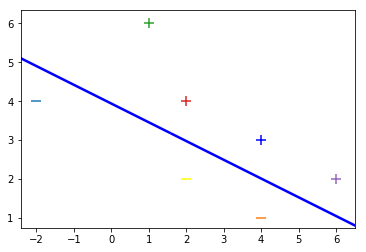

In [12]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Adiciona nossas amostras de teste
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Imprime o hiperplano calculado por svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

# Fim